In [11]:
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
import numpy as np
import pandas as pd
from datetime import datetime

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import sklearn.metrics
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [12]:
df2016 = pd.read_csv('../Data/Final Data/data2016.csv')
df2016.head()

,State,ST,FIPS,County,Democrats 2016,Republicans 2016,Green 2016,Libertarians 2016,winner,poor_health,...,unemployment,children_poverty,income_inequality,single_parent,violent_crime,air_polution,non_hispanic_african_american,non_hispanic_white,not_proficient_english,household_income
0,Alabama,AL,1001,"Autauga County, Alabama",0.239569,0.734358,0.004258,0.021816,republican,0.194,...,0.059,0.181,4.303,0.273,253.645,12.92,0.185,0.756,0.005,54366
1,Alabama,AL,1003,"Baldwin County, Alabama",0.195653,0.773515,0.004815,0.026018,republican,0.160,...,0.061,0.198,4.495,0.282,220.665,13.13,0.094,0.830,0.014,49626
2,Alabama,AL,1005,"Barbour County, Alabama",0.466603,0.522714,0.001732,0.008951,republican,0.257,...,0.108,0.381,5.286,0.545,146.889,12.62,0.472,0.466,0.022,34971
3,Alabama,AL,1007,"Bibb County, Alabama",0.214220,0.769662,0.001943,0.014175,republican,0.220,...,0.071,0.268,4.251,0.320,235.952,12.87,0.219,0.745,0.005,39546
4,Alabama,AL,1009,"Blount County, Alabama",0.084699,0.898519,0.003506,0.013276,republican,0.207,...,0.061,0.241,4.124,0.283,219.034,12.66,0.016,0.878,0.018,45567


In [13]:
# assign inputs and output values
X = df2016.iloc[:,9:]
y = df2016.iloc[:,8]

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# # Step 1: Label-encode data set
# label_encoder = LabelEncoder()
# label_encoder.fit(y)
# encoded_y = label_encoder.transform(y)

# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=42)

# from tensorflow.keras.utils import to_categorical
# # One-hot encoding
# y_train_categorical = to_categorical(y_train)
# y_test_categorical = to_categorical(y_test)

In [23]:
model = xgb.XGBClassifier(max_depth=12,
                        subsample=0.33,
                        objective='binary:logistic',
                        n_estimators=300,
                        learning_rate = 0.01)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=15, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.089232	validation_0-logloss:0.68556	validation_1-error:0.142674	validation_1-logloss:0.686471
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.070785	validation_0-logloss:0.678131	validation_1-error:0.102828	validation_1-logloss:0.679707
[2]	validation_0-error:0.066924	validation_0-logloss:0.670734	validation_1-error:0.100257	validation_1-logloss:0.673083
[3]	validation_0-error:0.064779	validation_0-logloss:0.66363	validation_1-error:0.106684	validation_1-logloss:0.666517
[4]	validation_0-error:0.065208	validation_0-logloss:0.656873	validation_1-error:0.095116	validation_1-logloss:0.660348
[5]	validation_0-error:0.061347	validation_0-logloss:0.649877	validation_1-error:0.09383	validation_1-logloss:0.654062
[6]	validation_0-error:0.061776	validation_0-logloss:0.643109	validation_1-error:0.096401	validation_1-logloss:0.64788

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.33, verbosity=1)

In [27]:
# make predictions for test data
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.44%


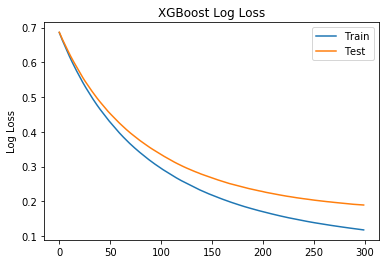

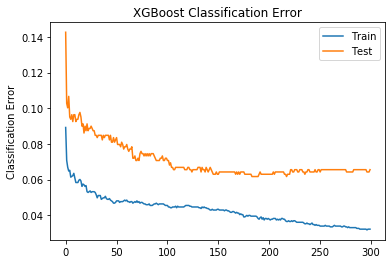

In [32]:
import matplotlib.pyplot as plt
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

[0]	validation_0-error:0.089232	validation_0-logloss:0.69238	validation_1-error:0.142674	validation_1-logloss:0.692474
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.070785	validation_0-logloss:0.691621	validation_1-error:0.102828	validation_1-logloss:0.691785
[2]	validation_0-error:0.066924	validation_0-logloss:0.690851	validation_1-error:0.100257	validation_1-logloss:0.691099
[3]	validation_0-error:0.064779	validation_0-logloss:0.690101	validation_1-error:0.106684	validation_1-logloss:0.690405
[4]	validation_0-error:0.06435	validation_0-logloss:0.689363	validation_1-error:0.100257	validation_1-logloss:0.689723
[5]	validation_0-error:0.060489	validation_0-logloss:0.688607	validation_1-error:0.100257	validation_1-logloss:0.689035
[6]	validation_0-error:0.061776	validation_0-logloss:0.687849	validation_1-error:0.097686	validation_1-logloss:0.6883

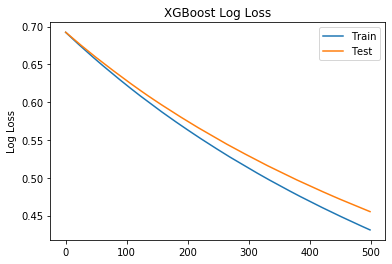

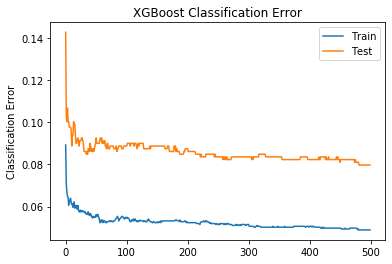

In [33]:
# increase n estimators, decrease learning rate, 
model = xgb.XGBClassifier(max_depth=12,
                        subsample=0.33,
                        objective='binary:logistic',
                        n_estimators=500,
                        learning_rate = 0.001,
                         early_stopping_rounds=10)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=15, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

[0]	validation_0-error:0.089232	validation_0-logloss:0.620923	validation_1-error:0.142674	validation_1-logloss:0.629798
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.069927	validation_0-logloss:0.560623	validation_1-error:0.105398	validation_1-logloss:0.575799
[2]	validation_0-error:0.066066	validation_0-logloss:0.510122	validation_1-error:0.114396	validation_1-logloss:0.532867
[3]	validation_0-error:0.059631	validation_0-logloss:0.466029	validation_1-error:0.105398	validation_1-logloss:0.492669
[4]	validation_0-error:0.057486	validation_0-logloss:0.428389	validation_1-error:0.098972	validation_1-logloss:0.457751
[5]	validation_0-error:0.050193	validation_0-logloss:0.39483	validation_1-error:0.09126	validation_1-logloss:0.426835
[6]	validation_0-error:0.051909	validation_0-logloss:0.36573	validation_1-error:0.09126	validation_1-logloss:0.401736

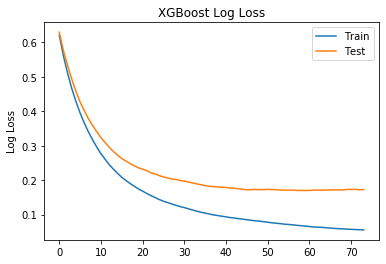

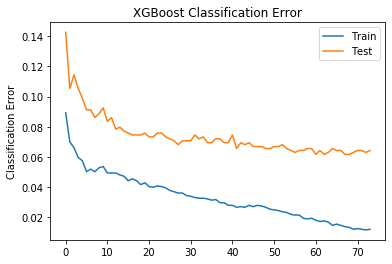

In [34]:
# increase n estimators, decrease learning rate, 
model = xgb.XGBClassifier(max_depth=12,
                        subsample=0.33,
                        objective='binary:logistic',
                        n_estimators=300,
                        learning_rate = 0.1,
                         early_stopping_rounds=10)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=15, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

[0]	validation_0-error:0.089232	validation_0-logloss:0.656045	validation_1-error:0.142674	validation_1-logloss:0.66052
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.069927	validation_0-logloss:0.622189	validation_1-error:0.105398	validation_1-logloss:0.630137
[2]	validation_0-error:0.065637	validation_0-logloss:0.591238	validation_1-error:0.119537	validation_1-logloss:0.603541
[3]	validation_0-error:0.061776	validation_0-logloss:0.562221	validation_1-error:0.101542	validation_1-logloss:0.577084
[4]	validation_0-error:0.062205	validation_0-logloss:0.5371	validation_1-error:0.097686	validation_1-logloss:0.554158
[5]	validation_0-error:0.064779	validation_0-logloss:0.512938	validation_1-error:0.095116	validation_1-logloss:0.532628
[6]	validation_0-error:0.059631	validation_0-logloss:0.489941	validation_1-error:0.098972	validation_1-logloss:0.51208

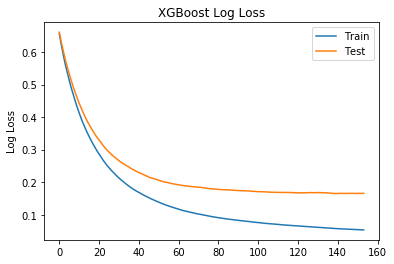

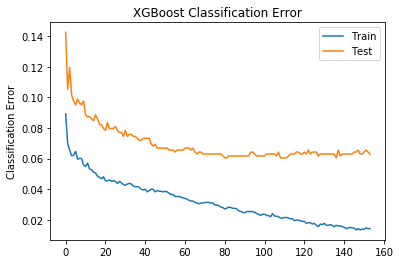

In [38]:
# increase n estimators, decrease learning rate, 
model = xgb.XGBClassifier(max_depth=12,
                        subsample=0.33,
                        objective='binary:logistic',
                        n_estimators=300,
                        learning_rate = 0.05,
                         early_stopping_rounds=20)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=15, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

[0]	validation_0-error:0.089232	validation_0-logloss:0.656045	validation_1-error:0.142674	validation_1-logloss:0.66052
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.069927	validation_0-logloss:0.622189	validation_1-error:0.105398	validation_1-logloss:0.630137
[2]	validation_0-error:0.065637	validation_0-logloss:0.591238	validation_1-error:0.119537	validation_1-logloss:0.603541
[3]	validation_0-error:0.061776	validation_0-logloss:0.562221	validation_1-error:0.101542	validation_1-logloss:0.577084
[4]	validation_0-error:0.062205	validation_0-logloss:0.5371	validation_1-error:0.097686	validation_1-logloss:0.554158
[5]	validation_0-error:0.064779	validation_0-logloss:0.512938	validation_1-error:0.095116	validation_1-logloss:0.532628
[6]	validation_0-error:0.059631	validation_0-logloss:0.489941	validation_1-error:0.098972	validation_1-logloss:0.51208

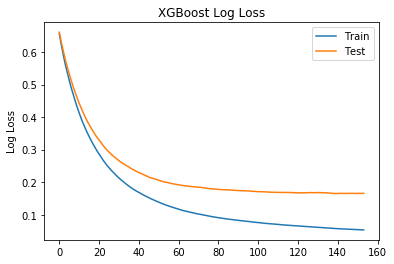

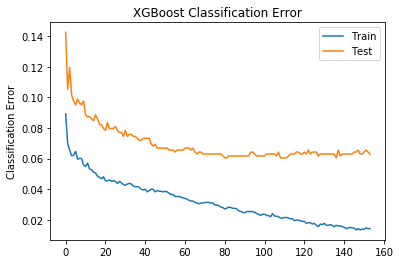

In [42]:
# change max depth
model = xgb.XGBClassifier(max_depth=20,
                        subsample=0.33,
                        objective='binary:logistic',
                        n_estimators=300,
                        learning_rate = 0.05,
                         early_stopping_rounds=10)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=15, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [43]:
model.best_score

0.165162